In [2]:
# Preliminary code
# load pandas (always do this first)
import pandas as pd
import geopandas as gpd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

traffic_data=pd.read_csv("https://data.wprdc.org/datastore/dump/6dfd4f8f-cbf5-4917-a5eb-fd07f4403167")
neighborhoods = gpd.read_file("Neighborhoods/Neighborhoods_.shp")

/opt/tljh/user/lib/python3.8/site-packages/geopandas/_compat.py:84: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  warnings.warn(


# Combined data

This is a combination of our sub-metrics to find the best neighborhood. We decided to use the best place to go to school as our metric.

## Raja's findings

Based on my metric of what neighborhood had the least percentage of speeders (and hence the least speeders), I determined that the Central Buisness District was the best. Alleghany West, may be used in stead if the Central Buisness District does not have schools (there are probably more schools in Alleghany West).

### The data:

The code below determines the mean percent speeding for each neighborhood and stores it. It then displayes a map of the neighboorhoods and their respecive speeder percentage. The purpler it gets, the less speeders there are.

neighborhood
Allegheny Center             65.000000
Allegheny West               11.000000
Arlington                    61.500000
Beechview                    59.000000
Beltzhoover                        NaN
Bloomfield                   26.500000
Bluff                        14.666667
Brighton Heights                   NaN
Brookline                    41.000000
California-Kirkbride               NaN
Carrick                      54.000000
Central Business District     6.000000
Central Lawrenceville        16.000000
Central Northside            22.500000
Central Oakland              23.500000
Chateau                            NaN
Crafton Heights              98.000000
Duquesne Heights             48.000000
East Allegheny               38.000000
East Hills                   98.000000
East Liberty                 65.625000
Elliott                      97.000000
Friendship                   68.000000
Greenfield                   75.000000
Hazelwood                          NaN
Highland Par

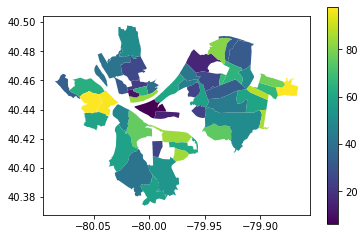

In [40]:
percent_speeding=traffic_data.groupby("neighborhood").mean()['percent_over_limit']
print(percent_speeding)
# Generate and plot traffic map
traffic_map=neighborhoods.merge(percent_speeding, how='left', left_on='hood', right_on='neighborhood')
traffic_map.plot(column='percent_over_limit', legend=True)

This code displayes a bar graph with the top 5 neighborhoods.

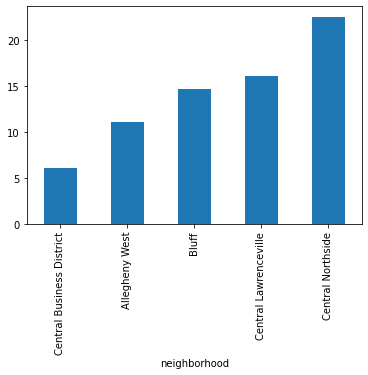

In [4]:
# Generate top 5 bar chart
percent_speeding.sort_values().head().plot(kind='bar')

As you can see, the one with the least traffic is the Central Buisness District, with Alleghany West coming in second.

## Friedrich's Analysis

In [5]:
import pandas as pd

data = pd.read_csv("race.csv", sep=",")
data.head()


,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,Estimate; Total: - White alone,Margin of Error; Total: - White alone,Estimate; Total: - Black or African American alone,Margin of Error; Total: - Black or African American alone,Estimate; Total: - American Indian and Alaska Native alone,Margin of Error; Total: - American Indian and Alaska Native alone,...,Estimate; Total: - Native Hawaiian and Other Pacific Islander alone,Margin of Error; Total: - Native Hawaiian and Other Pacific Islander alone,Estimate; Total: - Some other race alone,Margin of Error; Total: - Some other race alone,Estimate; Total: - Two or more races:,Margin of Error; Total: - Two or more races:,Estimate; Total: - Two or more races: - Two races including Some other race,Margin of Error; Total: - Two or more races: - Two races including Some other race,"Estimate; Total: - Two or more races: - Two races excluding Some other race, and three or more races","Margin of Error; Total: - Two or more races: - Two races excluding Some other race, and three or more races"
0,Allegheny Center,1,1411.0,196.000000,832.0,135.000000,329.0,104.000000,0.0,10.000000,...,5.0,8.000000,0.0,10.000000,115.0,90.000000,0.0,10.000000,115.0,90.000000
1,Allegheny West,2,343.0,96.000000,294.0,70.000000,15.0,17.000000,2.0,4.000000,...,0.0,10.000000,0.0,10.000000,32.0,36.000000,0.0,10.000000,32.0,36.000000
2,Allentown,3,2558.0,449.773276,1307.0,301.419973,1018.0,417.538022,0.0,17.320508,...,0.0,17.320508,12.0,23.685439,221.0,153.564319,0.0,17.320508,221.0,153.564319
3,Arlington,4,1852.0,348.188168,1427.0,243.018518,397.0,247.753910,0.0,17.320508,...,0.0,17.320508,0.0,17.320508,28.0,28.879058,0.0,17.320508,28.0,28.879058
4,Arlington Heights,5,272.0,126.000000,64.0,79.000000,173.0,116.000000,0.0,10.000000,...,0.0,10.000000,0.0,10.000000,35.0,58.000000,0.0,10.000000,35.0,58.000000


In [6]:
import pandas as pd
import statistics as st

print("Measures diversity in neighboorhoods")

white = 1
black = 2
ai_an = 3
asian = 4
native_h = 5

cols = ["Estimate; Total: - White alone", "Estimate; Total: - Black or African American alone",
       "Estimate; Total: - American Indian and Alaska Native alone",
       "Estimate; Total: - Asian alone",
       "Estimate; Total: - Native Hawaiian and Other Pacific Islander alone"]



d2 = list()
for number in range(91):
    d2.append([])
    
for number in range(91):
    temp = list()
    for i in range(5):
        temp.append(int(data[cols[i]].values[number]))
        
    for i in range(temp[0]):
        d2[number].append(white)
    for i in range(temp[1]):
        d2[number].append(black)
    for i in range(temp[2]):
        d2[number].append(ai_an)
    for i in range(temp[3]):
        d2[number].append(asian)
    for i in range(temp[4]):
        d2[number].append(native_h)
        

dictx = list()
for number in range(91):
    Dict = {}
    std = st.stdev(d2[number])
    neigh = data['Neighborhood'].values[number]
    Dict['Neighborhood'] = neigh
    Dict['STD'] = std
    dictx.append(Dict)


#Dict = sorted(Dict.items(), key=lambda x: x[1], reverse=True)
#print(Dict)


import csv 
  
field_names = ['Neighborhood', 'STD'] 
  
with open('cool.csv', 'w') as csvfile: 
    writer = csv.DictWriter(csvfile, fieldnames = field_names) 
    writer.writeheader() 
    writer.writerows(dictx) 

        


datax = pd.read_csv("cool.csv", sep=",")
datax = datax.sort_values('STD',ascending=False)
#datax.sort_values(by=["STD"], ascending=False)
pd.set_option('display.max_rows', datax.shape[0]+1)
print(datax)


Measures diversity in neighboorhoods
                 Neighborhood       STD
68                  Shadyside  1.274492
33                 Friendship  1.215615
56              North Oakland  1.125583
76        Squirrel Hill North  1.074900
77        Squirrel Hill South  1.046913
70              South Oakland  1.006478
5                  Banksville  1.000073
89                   Westwood  0.984895
0            Allegheny Center  0.945467
57                North Shore  0.911901
16  Central Business District  0.890668
80             Strip District  0.865561
88               West Oakland  0.846929
83            Terrace Village  0.783232
37                       Hays  0.766853
43                  Knoxville  0.760810
31                  Fairywood  0.753049
85                 Upper Hill  0.751802
19            Central Oakland  0.748964
28               East Liberty  0.742798
52       Mount Oliver Borough  0.700024
63               Point Breeze  0.699906
29                    Elliott  0.699065
38 

To find the diversity level of each neighborhood, I used standard deviation, which tells you how spread out the data is.
By assigning different values for different races 1-5. I was able to calculate the standard deviation of each neighborhood. The higher the standard deviation the more diverse the neighborhood is.  

## Alec's Findings
This dataset accounts for the school enrollments of neighborhoods across pittsburgh - it accounts for each level of schooling as well. The main focus will be the ratio of elementary school students, high school students, and college students compared to the overall population of the neighborhood. The highest averaged ratio after considering each element will reveal the best overall place to live for an optimal schooling atmosphere. 

In [7]:
import pandas as pd
import numpy as np
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt

In [8]:
schoolE = pd.read_csv("school-enrollment.csv")
schoolE

,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,Estimate; Enrolled in school:,Margin of Error; Enrolled in school:,"Estimate; Enrolled in school: - Enrolled in nursery school, preschool","Margin of Error; Enrolled in school: - Enrolled in nursery school, preschool",Estimate; Enrolled in school: - Enrolled in kindergarten,Margin of Error; Enrolled in school: - Enrolled in kindergarten,...,Estimate; Enrolled in school: - Enrolled in grade 11,Margin of Error; Enrolled in school: - Enrolled in grade 11,Estimate; Enrolled in school: - Enrolled in grade 12,Margin of Error; Enrolled in school: - Enrolled in grade 12,"Estimate; Enrolled in school: - Enrolled in college, undergraduate years","Margin of Error; Enrolled in school: - Enrolled in college, undergraduate years",Estimate; Enrolled in school: - Graduate or professional school,Margin of Error; Enrolled in school: - Graduate or professional school,Estimate; Not enrolled in school,Margin of Error; Not enrolled in school
0,Allegheny Center,1,1389.0,193.000000,394.0,120.000000,48.0,29.000000,0.0,10.000000,...,0.0,10.000000,21.0,32.000000,150.0,60.000000,51.0,35.000000,995.0,135.000000
1,Allegheny West,2,343.0,96.000000,61.0,44.000000,0.0,10.000000,0.0,10.000000,...,9.0,12.000000,0.0,10.000000,2.0,4.000000,25.0,22.000000,282.0,74.000000
2,Allentown,3,2520.0,449.503059,965.0,312.800256,19.0,22.825424,23.0,28.722813,...,41.0,53.823787,81.0,72.718636,125.0,87.120606,74.0,101.469207,1555.0,267.807767
3,Arlington,4,1823.0,342.302498,427.0,127.722355,7.0,17.916473,6.0,17.916473,...,37.0,27.000000,17.0,27.856777,142.0,69.231496,16.0,18.493242,1396.0,267.159129
4,Arlington Heights,5,213.0,115.000000,40.0,49.000000,28.0,49.000000,0.0,10.000000,...,0.0,10.000000,0.0,10.000000,12.0,14.000000,0.0,10.000000,173.0,87.000000
5,Banksville,6,3787.0,569.215249,402.0,186.180020,28.0,37.749172,0.0,20.000000,...,15.0,31.240999,25.0,33.376639,23.0,32.924155,99.0,93.616238,3385.0,509.464425
6,Bedford Dwellings,7,1251.0,149.000000,337.0,121.000000,28.0,34.000000,57.0,43.000000,...,22.0,20.000000,12.0,19.000000,24.0,20.000000,0.0,10.000000,914.0,102.000000
7,Beechview,8,7770.0,685.333495,1783.0,313.268256,145.0,74.337070,47.0,44.888751,...,26.0,36.959437,80.0,58.497863,559.0,142.112631,210.0,83.731714,5987.0,543.243960
8,Beltzhoover,9,1609.0,310.282130,342.0,137.640837,19.0,24.979992,0.0,20.000000,...,40.0,49.203658,24.0,37.269290,140.0,76.642025,6.0,20.000000,1267.0,242.159039
9,Bloomfield,10,8498.0,469.304805,2185.0,264.384190,39.0,32.908965,30.0,39.306488,...,27.0,38.961519,88.0,63.340350,693.0,166.027106,983.0,181.526858,6313.0,385.164900


In [9]:
dfElementary= pd.DataFrame(schoolE, columns = ['Neighborhood','Estimate; Total:','Estimate; Enrolled in school: - Enrolled in kindergarten',
                                      'Estimate; Enrolled in school: - Enrolled in grade 1', 'Estimate; Enrolled in school: - Enrolled in grade 2',
                                      'Estimate; Enrolled in school: - Enrolled in grade 3','Estimate; Enrolled in school: - Enrolled in grade 4','Estimate; Enrolled in school: - Enrolled in grade 5'])

dfElementary

,Neighborhood,Estimate; Total:,Estimate; Enrolled in school: - Enrolled in kindergarten,Estimate; Enrolled in school: - Enrolled in grade 1,Estimate; Enrolled in school: - Enrolled in grade 2,Estimate; Enrolled in school: - Enrolled in grade 3,Estimate; Enrolled in school: - Enrolled in grade 4,Estimate; Enrolled in school: - Enrolled in grade 5
0,Allegheny Center,1389.0,0.0,46.0,0.0,0.0,33.0,0.0
1,Allegheny West,343.0,0.0,16.0,0.0,0.0,0.0,0.0
2,Allentown,2520.0,23.0,120.0,55.0,96.0,57.0,60.0
3,Arlington,1823.0,6.0,5.0,24.0,36.0,9.0,19.0
4,Arlington Heights,213.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Banksville,3787.0,0.0,23.0,22.0,0.0,53.0,54.0
6,Bedford Dwellings,1251.0,57.0,28.0,0.0,22.0,0.0,21.0
7,Beechview,7770.0,47.0,51.0,211.0,26.0,62.0,49.0
8,Beltzhoover,1609.0,0.0,0.0,0.0,9.0,21.0,13.0
9,Bloomfield,8498.0,30.0,41.0,18.0,18.0,35.0,3.0


In [10]:
dfElementary["Elementary School Ratio"] = \
   ((dfElementary['Estimate; Enrolled in school: - Enrolled in kindergarten'] + dfElementary['Estimate; Enrolled in school: - Enrolled in grade 1'] 
    + dfElementary['Estimate; Enrolled in school: - Enrolled in grade 2'] + dfElementary['Estimate; Enrolled in school: - Enrolled in grade 3']
    + dfElementary['Estimate; Enrolled in school: - Enrolled in grade 4'] + dfElementary['Estimate; Enrolled in school: - Enrolled in grade 5']) / dfElementary["Estimate; Total:"]) * 100


eRatio = dfElementary[['Neighborhood','Elementary School Ratio']].sort_values(by = ['Elementary School Ratio'], ascending = False)
eRatio.head(10)

,Neighborhood,Elementary School Ratio
2,Allentown,16.309524
58,Northview Heights,16.299862
40,Homewood North,14.828151
43,Knoxville,12.290503
75,Spring Hill-City View,11.916194
78,St. Clair,11.877395
20,Chartiers City,11.250000
69,Sheraden,11.191403
22,Crafton Heights,10.577684
6,Bedford Dwellings,10.231815


In [11]:
dfHS= pd.DataFrame(schoolE, columns = ['Neighborhood','Estimate; Total:','Estimate; Enrolled in school: - Enrolled in grade 9', 'Estimate; Enrolled in school: - Enrolled in grade 10',
                                      'Estimate; Enrolled in school: - Enrolled in grade 11','Estimate; Enrolled in school: - Enrolled in grade 12'])
dfHS

,Neighborhood,Estimate; Total:,Estimate; Enrolled in school: - Enrolled in grade 9,Estimate; Enrolled in school: - Enrolled in grade 10,Estimate; Enrolled in school: - Enrolled in grade 11,Estimate; Enrolled in school: - Enrolled in grade 12
0,Allegheny Center,1389.0,6.0,10.0,0.0,21.0
1,Allegheny West,343.0,9.0,0.0,9.0,0.0
2,Allentown,2520.0,20.0,61.0,41.0,81.0
3,Arlington,1823.0,40.0,12.0,37.0,17.0
4,Arlington Heights,213.0,0.0,0.0,0.0,0.0
5,Banksville,3787.0,0.0,13.0,15.0,25.0
6,Bedford Dwellings,1251.0,55.0,3.0,22.0,12.0
7,Beechview,7770.0,45.0,78.0,26.0,80.0
8,Beltzhoover,1609.0,0.0,34.0,40.0,24.0
9,Bloomfield,8498.0,10.0,34.0,27.0,88.0


In [12]:
dfHS['High School Ratio'] = \
     ((dfHS['Estimate; Enrolled in school: - Enrolled in grade 9'] + dfHS['Estimate; Enrolled in school: - Enrolled in grade 10']
    + dfHS['Estimate; Enrolled in school: - Enrolled in grade 11'] + dfHS['Estimate; Enrolled in school: - Enrolled in grade 12']) / dfHS["Estimate; Total:"]) * 100

hRatio = dfHS[['Neighborhood', 'High School Ratio']].sort_values(by = 'High School Ratio', ascending = False)
hRatio.head(10)

,Neighborhood,High School Ratio
35,Glen Hazel,11.738484
29,Elliott,11.061588
11,Bon Air,10.526316
32,Fineview,9.098497
2,Allentown,8.055556
52,Mount Oliver Borough,7.998783
54,Mt. Oliver,7.666099
55,New Homestead,7.612096
85,Upper Hill,7.511987
6,Bedford Dwellings,7.354117


In [13]:
dfUG = pd.DataFrame(schoolE, columns = ['Neighborhood','Estimate; Total:','Estimate; Enrolled in school: - Enrolled in college, undergraduate years',
                                        'Estimate; Enrolled in school: - Graduate or professional school'])
                                     
dfUG

,Neighborhood,Estimate; Total:,"Estimate; Enrolled in school: - Enrolled in college, undergraduate years",Estimate; Enrolled in school: - Graduate or professional school
0,Allegheny Center,1389.0,150.0,51.0
1,Allegheny West,343.0,2.0,25.0
2,Allentown,2520.0,125.0,74.0
3,Arlington,1823.0,142.0,16.0
4,Arlington Heights,213.0,12.0,0.0
5,Banksville,3787.0,23.0,99.0
6,Bedford Dwellings,1251.0,24.0,0.0
7,Beechview,7770.0,559.0,210.0
8,Beltzhoover,1609.0,140.0,6.0
9,Bloomfield,8498.0,693.0,983.0


In [14]:
dfUG['College Ratio'] = \
     ((dfUG['Estimate; Enrolled in school: - Enrolled in college, undergraduate years'] + 
       dfUG['Estimate; Enrolled in school: - Graduate or professional school'])/ dfUG["Estimate; Total:"]) * 100

uRatio = dfUG[['Neighborhood', 'College Ratio']].sort_values(by = 'College Ratio', ascending = False)
uRatio.head(10)


,Neighborhood,College Ratio
19,Central Oakland,79.233940
56,North Oakland,73.005750
10,Bluff,56.241056
83,Terrace Village,49.670619
70,South Oakland,47.457045
76,Squirrel Hill North,42.313945
16,Central Business District,40.029725
88,West Oakland,39.024390
71,South Shore,33.333333
68,Shadyside,31.354402


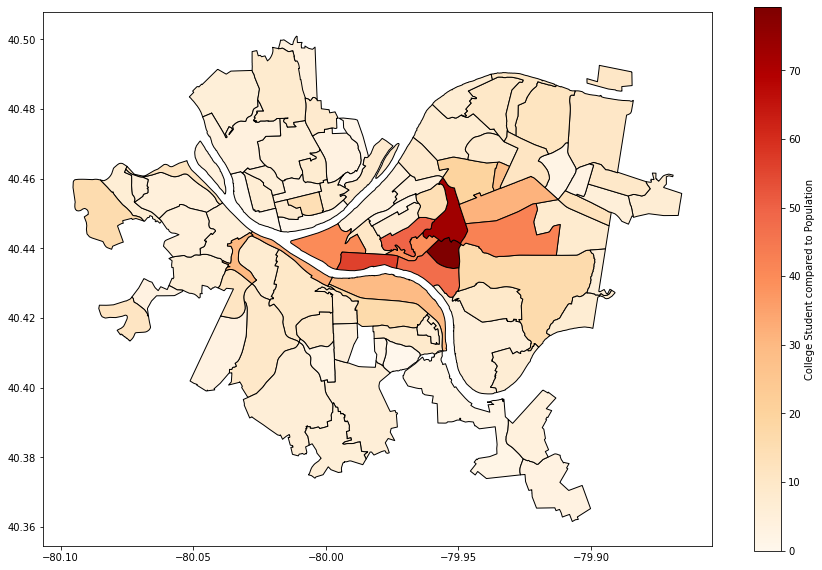

In [15]:
graph = uRatio.groupby('Neighborhood').sum()['College Ratio']
# aid.sort_values(ascending = False)

neighborhoods = gpd.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
#neighborhoods.plot()

geomap = neighborhoods.merge(graph, how = 'left', left_on = 'hood', right_on = 'Neighborhood') 
#geomap.plot(column = 'College Ratio')
#geomap.plot(columns = 'College Ratio')


geomap.plot(column = 'College Ratio', cmap = 'OrRd', edgecolor = 'black', legend = True, 
            legend_kwds = {'label': "College Student compared to Population",}, figsize = (15,10))

In [16]:
dfUG['College Ratio'] = \
     ((dfUG['Estimate; Enrolled in school: - Enrolled in college, undergraduate years'] + 
       dfUG['Estimate; Enrolled in school: - Graduate or professional school'])/ dfUG["Estimate; Total:"]) * 100

dfUG['High School Ratio'] = \
     (dfHS['High School Ratio'])

dfUG['Elementary School Ratio'] = \
    (dfElementary['Elementary School Ratio'])

dfUlt = pd.DataFrame(dfUG, columns = ['Neighborhood', 'Elementary School Ratio', 'High School Ratio', 'College Ratio'])

In [17]:
dfUlt['Averaged Ratio'] = \
    ((dfUlt['Elementary School Ratio'] + dfUlt['High School Ratio'] + dfUlt['College Ratio']) / 3)
another_one = dfUlt[['Neighborhood', 'Averaged Ratio']].sort_values(by = 'Averaged Ratio', ascending = False)
another_one.head(30)


,Neighborhood,Averaged Ratio
19,Central Oakland,26.480018
56,North Oakland,24.990416
10,Bluff,19.096836
83,Terrace Village,18.298931
70,South Oakland,17.182131
76,Squirrel Hill North,16.504094
88,West Oakland,14.594487
16,Central Business District,13.640492
68,Shadyside,11.246551
71,South Shore,11.111111


In [18]:
dfUlt.mean()

Elementary School Ratio     5.324273
High School Ratio           3.951706
College Ratio              12.420270
Averaged Ratio              7.232083
dtype: float64

In [19]:
print(dfUlt.iloc[39])

print(dfUlt.iloc[77])
print(dfUlt.iloc[73])
print(dfUlt.iloc[28])


Neighborhood               Highland Park
Elementary School Ratio          6.07541
High School Ratio                4.53366
College Ratio                    11.7539
Averaged Ratio                   7.45433
Name: 39, dtype: object
Neighborhood               Squirrel Hill South
Elementary School Ratio                6.33785
High School Ratio                       2.7853
College Ratio                          16.1122
Averaged Ratio                         8.41178
Name: 77, dtype: object
Neighborhood               South Side Slopes
Elementary School Ratio              2.58036
High School Ratio                    4.85458
College Ratio                        16.5318
Averaged Ratio                       7.98892
Name: 73, dtype: object
Neighborhood               East Liberty
Elementary School Ratio         4.01363
High School Ratio               6.72094
College Ratio                   11.2647
Averaged Ratio                  7.33308
Name: 28, dtype: object


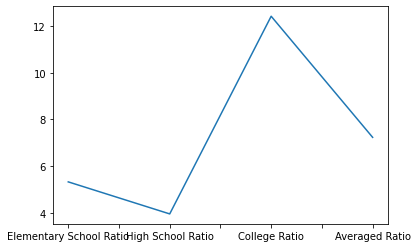

In [20]:
dfUlt.mean().plot()

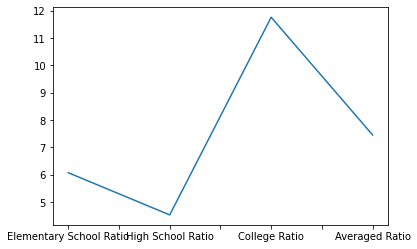

In [21]:
drop = dfUlt.drop(columns = ['Neighborhood'])
drop.iloc[39].plot()

Highland Park was the best neighborhood in terms of enrollment in each level of schooling compared to the population!!

# Bringing it all together

Now we have to combine our metrics(they don't all agree). As you can see, Central Buisness District, when normalized, is the best in the combined metrics of diversity and safe drivers.

In [61]:
def complement(x):
    return (100.0-x)/100.0
inverted = percent_speeding.apply(complement)
inverted

diversity = pd.Series(datax['STD'].values/2, index=datax['Neighborhood'])
combined_data=diversity.add(inverted, fill_value=0)
combined_data.sort_values().tail()

Upper Hill                   1.132568
Central Oakland              1.139482
Bluff                        1.171420
Shadyside                    1.307246
Central Business District    1.385334
dtype: float64